In [1]:
import os
import numpy as np

from glob import glob
from PIL import Image
from statistics import mean
from numpy.random import randint
from matplotlib import pyplot as plt

In [2]:
CLASSES = 31

def png_load(dir_name):
    """
    Loads all *.png images from directory dir_name into a dictionary. Keys are the file names
    and values and 2D numpy arrays with corresponding grayscale images
    """
    features = {}
    for f in glob(dir_name + '/*.png'):
        features[f] = np.array(Image.open(f).convert('L'), dtype=np.float64)
    return features

In [37]:
from sklearn import svm
from sklearn.model_selection import train_test_split

train_x = np.empty((0,80*80))
train_y = np.empty((0),dtype=int)

test_x = np.empty((0,80*80))
test_y = np.empty((0),dtype=int)

for i in range(1,CLASSES+1):
    train_i = np.array(list(png_load(os.path.join("train",str(i))).values())).reshape(-1, 80 * 80)
    label_i = np.full(len(train_i),i-1)
    train_x = np.concatenate((train_x, train_i), axis=0)
    train_y = np.concatenate((train_y, label_i), axis=0)

    test_i = np.array(list(png_load(os.path.join("dev",str(i))).values())).reshape(-1, 80 * 80)
    label_i = np.full(len(test_i),i-1)
    test_x = np.concatenate((test_x, test_i), axis=0)
    test_y = np.concatenate((test_y, label_i), axis=0)

print("Images were successfully loaded")

train_x = np.concatenate((train_x, test_x), axis=0)
train_y = np.concatenate((train_y, test_y), axis=0)

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.3,random_state=109)

clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(train_x, train_y)
predicted = clf.predict(test_x)
correct = (predicted == test_y).sum().item()
accuracy = correct / len(test_y)
print(f'Accuracy: {accuracy:.4f}, {correct} and {len(test_y)}')

Images were successfully loaded
Accuracy: 0.5867, 44 and 75


Images were successfully loaded
(6400,)
(62, 62)


/home/alex/SUR/ikrlib.py:117: RuntimeWarning: invalid value encountered in divide
  mus = gamma.dot(x) / gammasum[:, np.newaxis]
/home/alex/SUR/ikrlib.py:124: RuntimeWarning: invalid value encountered in divide
  [(gamma[i] * x.T).dot(x) / gammasum[i] - mus[i][:, newaxis].dot(mus[[i]]) for i in range(len(ws))])


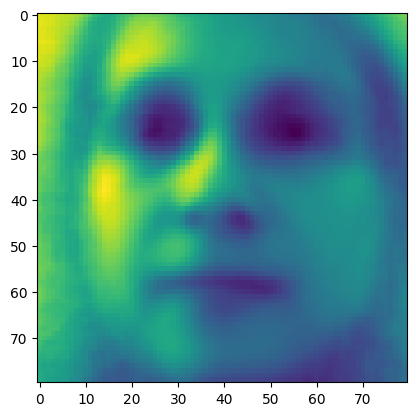

In [3]:
from ikrlib import train_gmm, train_gauss

train_x = np.empty((0,80*80))
train_y = np.empty((0),dtype=int)

test_x = np.empty((0,80*80))
test_y = np.empty((0),dtype=int)

for i in range(1,CLASSES+1):
    train_i = np.array(list(png_load(os.path.join("train",str(i))).values())).reshape(-1, 80 * 80)
    label_i = np.full(len(train_i),i-1)
    train_x = np.concatenate((train_x, train_i), axis=0)
    train_y = np.concatenate((train_y, label_i), axis=0)

    test_i = np.array(list(png_load(os.path.join("dev",str(i))).values())).reshape(-1, 80 * 80)
    label_i = np.full(len(test_i),i-1)
    test_x = np.concatenate((test_x, test_i), axis=0)
    test_y = np.concatenate((test_y, label_i), axis=0)

print("Images were successfully loaded")

mean_face = np.mean(train_x, axis=0)
train_x = train_x - mean_face
v, s, u = np.linalg.svd(train_x, full_matrices=False)
train_x = train_x.dot(u.T)
print(mean_face.shape)
plt.imshow(mean_face.reshape(80, 80))

v, s, u = np.linalg.svd(test_x, full_matrices=False)
test_x = test_x.dot(u.T)
print(test_x.shape)

mus = []
covs = []

for x in range(CLASSES - 1):
    data = train_x[train_y == x]
    mu, cov = train_gauss(data)
    mus.append(mu)
    covs.append(cov)

ws = np.ones(len(train_x)) / len(train_x)
ws, mus, covs, tll = train_gmm(train_x, ws, mus, covs)